In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
mu = [1, -1, 0]  # mean vector of [X1,X2,X3]
sigma = [[1, -0.5, 0.8], [-0.5, 1, -0.8], [0.8, -0.5, 1]]  # covariance matrix of [X1,X2,X3]

mu = np.asarray(mu)  # make a Numpy array
sigma = np.asarray(sigma)

## Exercise 2c

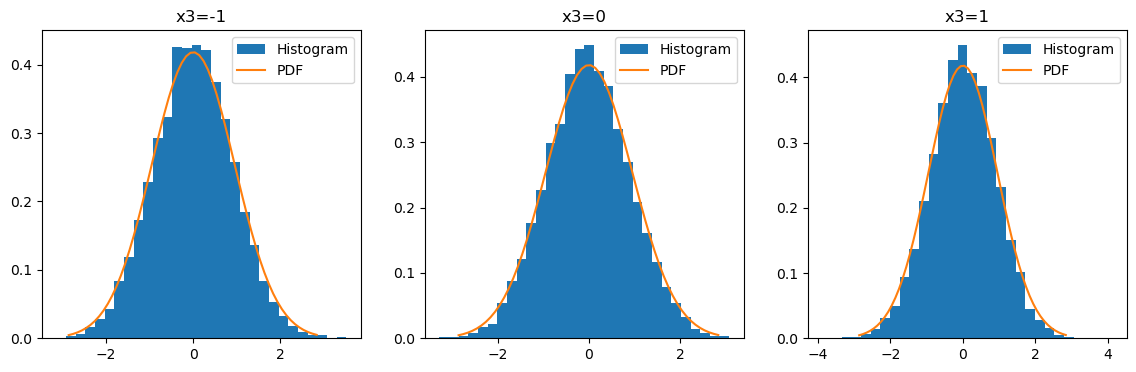

In [4]:
n = 10000  # number of samples to estimate the empirical distribution of Y

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
for idx, x3 in enumerate([-1, 0, 1]):

    # parameters for the conditional distribution p(x1,x2|x3)
    mu_cond = mu[0:2] - (x3-mu[2])*sigma[0:2, 2]/sigma[2, 2]
    sigma_cond = sigma[0:2, 0:2] - np.outer(sigma[2, :2], sigma[2, :2])/sigma[2, 2]

    l_cond = np.linalg.cholesky(sigma_cond)
    z = np.random.randn(n, 2)
    x_cond = z @ l_cond + mu_cond  # produce Gaussian samples distributed as X1,X2|X3
    y = x_cond.sum(axis=1)  # X1+X2|X3

    # parameters for the Y~p(x1+x2|x3)
    muY = mu_cond.sum()
    varY = sigma_cond.sum()
    sigmaY = np.sqrt(varY)

    yrange = np.arange(-3*sigmaY, 3*sigmaY, 0.1)
    pdfy = np.exp( -(yrange - muY)**2 / (2*sigmaY**2) ) / (sigmaY*np.sqrt(2*np.pi))  # compute the PDF with the formula

    ax[idx].hist(y, bins=30, density=True, label='Histogram')
    ax[idx].plot(yrange, pdfy, label='PDF')
    ax[idx].legend()
    ax[idx].set_title(f'x3={x3}')

plt.savefig('results/ex2c.pdf', bbox_inches='tight', pad_inches=0)
plt.draw()
